Day_of_Week
Friday       158.5
Monday       153.5
Saturday     163.0
Sunday       183.5
Thursday     174.5
Tuesday      192.5
Wednesday    193.0
Name: Total_Sales, dtype: float64


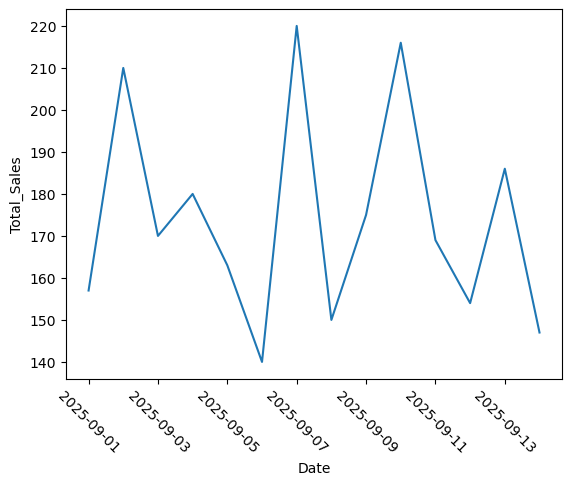

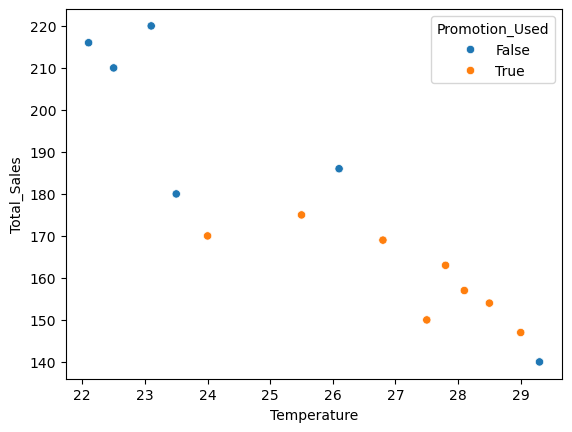

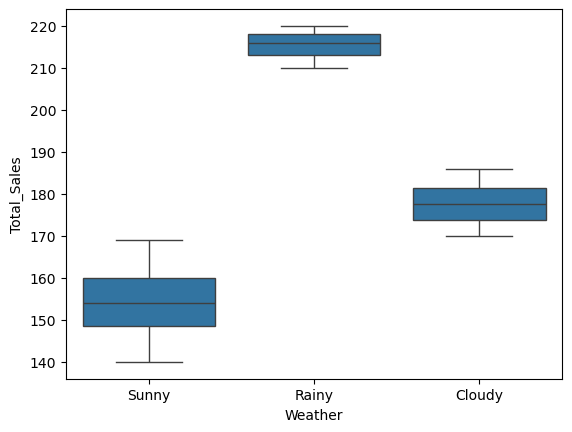

In [244]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = {
    'Date': pd.to_datetime(['2025-09-01', '2025-09-02', '2025-09-03', '2025-09-04', '2025-09-05', '2025-09-06', '2025-09-07',
                           '2025-09-08', '2025-09-09', '2025-09-10', '2025-09-11', '2025-09-12', '2025-09-13', '2025-09-14']),
    'Weather': ['Sunny', 'Rainy', 'Cloudy', 'Cloudy', 'Sunny', 'Sunny', 'Rainy',
                'Sunny', 'Cloudy', 'Rainy', 'Sunny', 'Sunny', 'Cloudy', 'Sunny'],
    'Temperature': [28.1, 22.5, 24.0, 23.5, 27.8, 29.3, 23.1,
                    27.5, 25.5, 22.1, 26.8, 28.5, 26.1, 29.0], # 온도 (섭씨)
    'Americano_Sales': [102, 135, 110, 115, 105, 95, 140, 98, 112, 138, 108, 101, 118, 99], # 아메리카노 판매량
    'Latte_Sales': [55, 75, 60, 65, 58, 45, 80, 52, 63, 78, 61, 53, 68, 48], # 라떼 판매량
    'Promotion_Used': [True, False, True, False, True, False, False,
                       True, True, False, True, True, False, True] # 프로모션 진행 여부
}
df_cafe = pd.DataFrame(data)

# 데이터 전처리
df_cafe['Day_of_Week'] = df_cafe['Date'].dt.day_name() # 요일 출력하는 열 추가
# .dt.day_name(): 날짜를 자동으로 계산해서 요일을 불러오는 함수

# 새로운 정보 생성
df_cafe['Total_Sales'] = df_cafe['Americano_Sales'] + df_cafe['Latte_Sales']  # 총 음류 판매량 출력하는 열 추가
df_cafe['Is_Weekend'] = df_cafe['Day_of_Week'].isin(['Saturday', 'Sunday'])  # 주말인지 출력해주는 열 추가
# .isin(): 여러 개의 조건을 한 번에 확인할 때, True or False로 알려줌

# 심층 분석 및 새로운 시각화
top_sales_day = df_cafe.groupby('Day_of_Week')['Total_Sales'].mean()  # 요일별 총 음류 판매량의 평균
print(top_sales_day) # 수요일이 판매량이 가장 높음

sns.lineplot(x='Date', y='Total_Sales', data=df_cafe)  # 날짜별 음류 총판매량 라인그래프
plt.xticks(rotation=-45)
plt.show()   # 판매량이 일정하지 않음

sns.scatterplot(x='Temperature', y='Total_Sales', hue='Promotion_Used', data=df_cafe)
plt.show()  # 온도가 높으질수록 판매량은 하락하고(음의 상관계수), 프로모션의 효과가 미미해 보임

sns.boxplot(x='Weather', y='Total_Sales', data=df_cafe)
plt.show() # 비가 오는날이 가장 판매량이 많고, 화창한 날이 판매량의 변동이 가장 큼